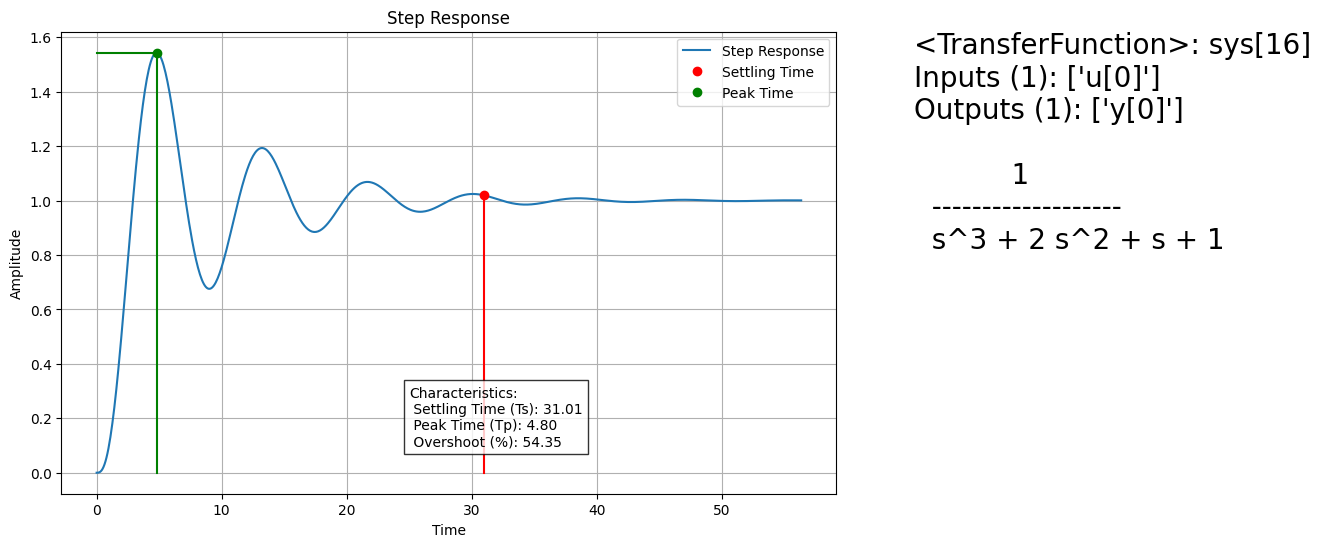

In [3]:
import control
from control.matlab import *
import matplotlib.pyplot as plt
import sympy
import scipy.interpolate as interpolate


Kt=1;L=1;J=1;B=1;R=1;

G = tf([Kt/L/J],[J,  B/J+R/L, R*B/L/J, 0])

sys = feedback(G,1)

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
yout, T = step(sys)
plt.plot(T.T, yout.T, label='Step Response')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title(f'Step Response')
plt.grid(True)
plt.legend()

fint=interpolate.interp1d(T, yout, kind='cubic')
info = stepinfo(sys)
rt = info['RiseTime']
ts = info['SettlingTime']
settling_min = info['SettlingMin']
settling_max = info['SettlingMax']
overshoot = info['Overshoot']
undershoot = info['Undershoot']
peak = info['Peak']
tp = info['PeakTime']

yts=fint(ts)
ytp=fint(tp)
plt.text(1.1, 1, sys, horizontalalignment='left', verticalalignment='top',
          transform=plt.gca().transAxes, fontsize=20)

plt.text(25, 0.1,f"Characteristics:\n"f" Settling Time (Ts): {ts:.2f}\n"
f" Peak Time (Tp): {tp:.2f}\n"f" Overshoot (%): {overshoot:.2f}",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.plot(ts, yts, 'ro', label='Settling Time')
plt.plot([ts,ts], [0,yts], 'r')
plt.plot([tp,tp], [0,ytp],'g')
plt.plot([0,tp], [ytp,ytp],'g')
plt.plot(tp, ytp,'go', label='Peak Time')
plt.legend()
plt.show()

/usr/local/python/3.12.1/lib/python3.12/site-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


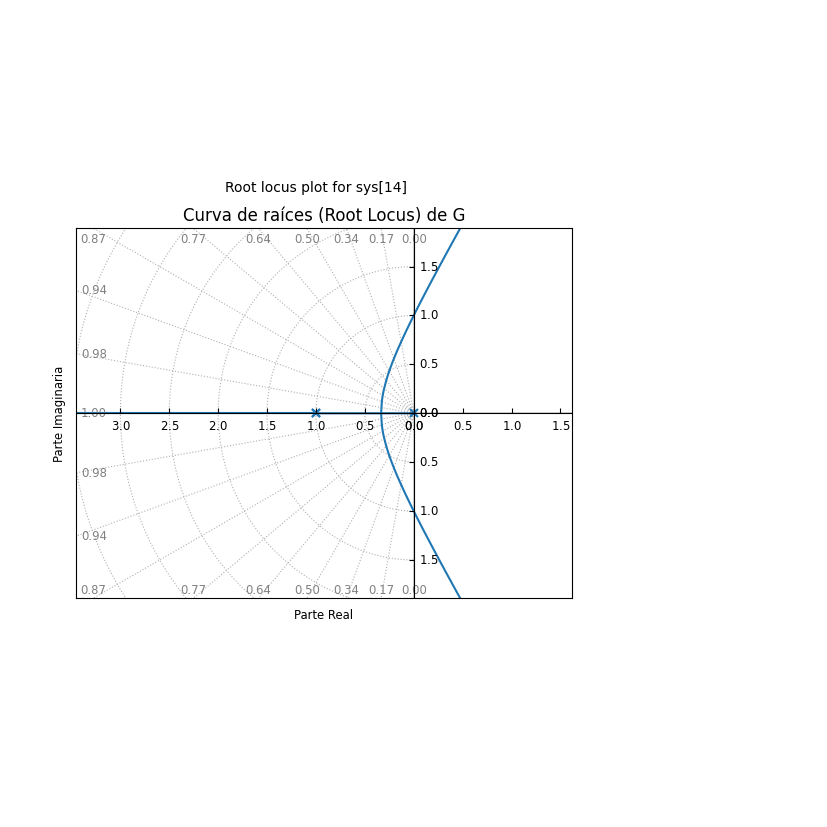

In [4]:
# Curva de raíces (Root Locus) de G
rlocus(G)
plt.title('Curva de raíces (Root Locus) de G')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.show()